In [2]:
#import dataset/libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
from keras.datasets import cifar10
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_test.shape

(10000, 1)

[7]


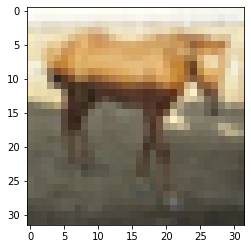

In [19]:
i = 2000
plt.imshow(X_train[i])
print(y_train[i])

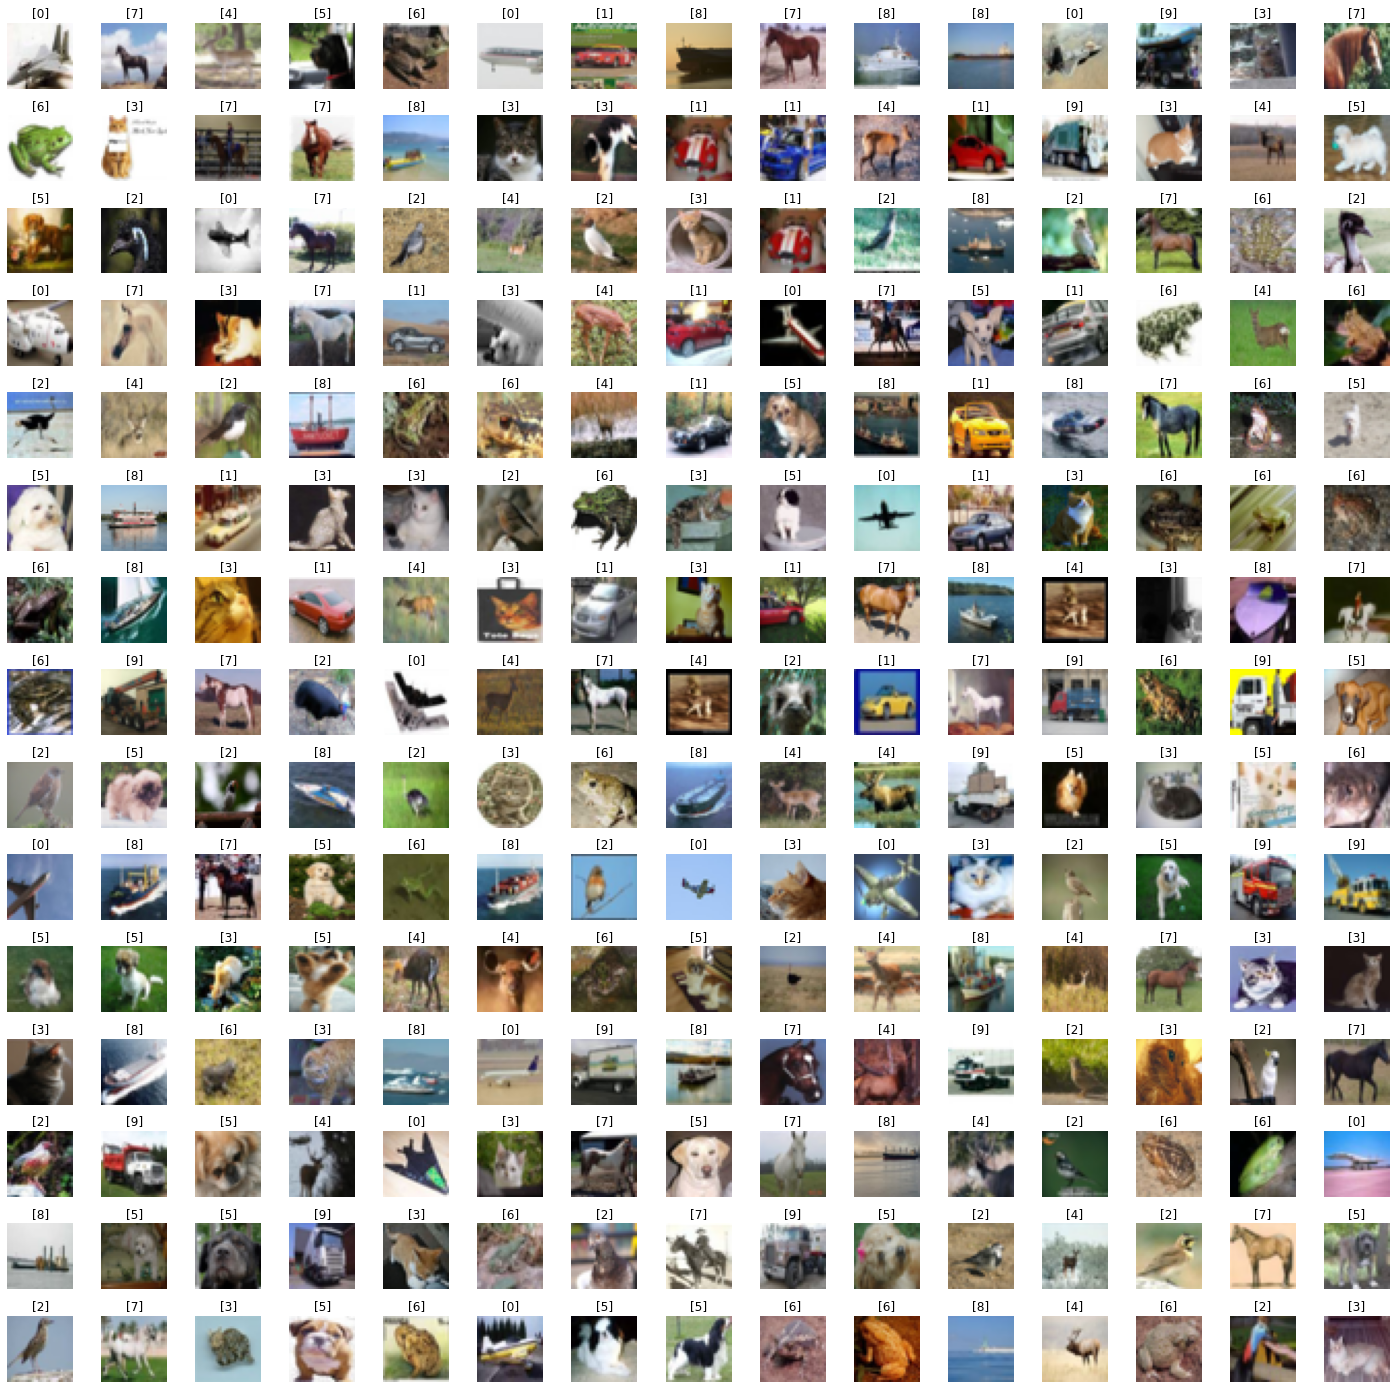

In [25]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize= (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
    
plt.subplots_adjust(hspace = 0.4)

    

In [28]:
# Data Preparation

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [29]:
number_cat = 10

In [30]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [31]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [32]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [34]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [35]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [36]:
X_train =  X_train/255
X_test =  X_test/255

In [37]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [38]:
Input_shape = X_train.shape[1:]

In [39]:
Input_shape

(32, 32, 3)

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [44]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size = (3,3), activation ='relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters=32, kernel_size = (3,3), activation ='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64, kernel_size = (3,3), activation ='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size = (3,3), activation ='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation='relu'))
cnn_model.add(Dense(units = 512, activation='relu'))

cnn_model.add(Dense(units = 10, activation='softmax'))

In [50]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [52]:
 history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 220s 140ms/step - loss: 1.8085 - accuracy: 0.3391
Epoch 2/2
1563/1563 [==============================] - 186s 119ms/step - loss: 1.1871 - accuracy: 0.5809


In [53]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(evaluation)

313/313 [==============================] - 10s 29ms/step - loss: 1.1797 - accuracy: 0.6358
[1.1797391176223755, 0.6358000040054321]


In [54]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:459: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 1, 8, ..., 5, 1, 7], dtype=int64)

In [55]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [56]:
y_test = y_test.argmax(1)

In [57]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

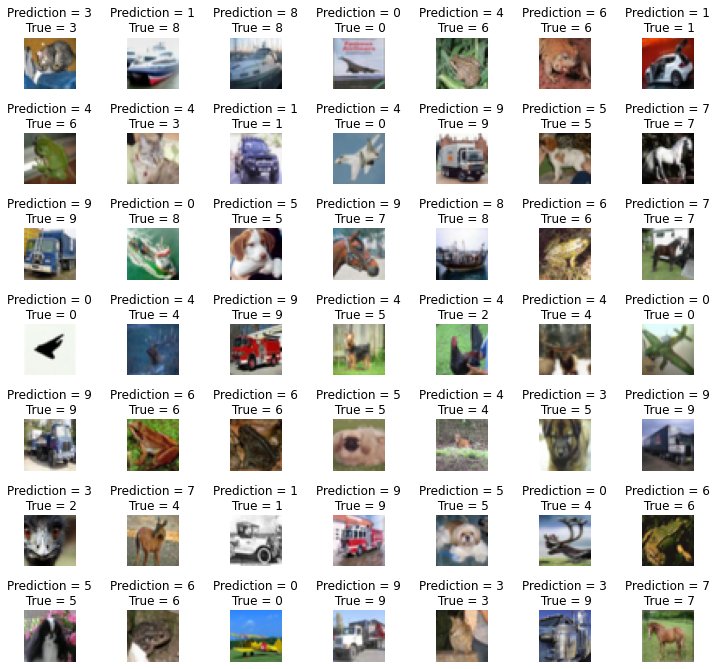

In [58]:
L = 7
W = 7 
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes =  axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1) 

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)

In [61]:
 cm

array([[673,  48,  16,  17,  39,   5,   1,  10, 157,  34],
       [  9, 881,   1,   6,   6,   2,   5,   5,  27,  58],
       [ 88,  13, 297,  79, 311,  56,  43,  53,  50,  10],
       [ 20,  15,  26, 430, 198, 128,  51,  64,  36,  32],
       [ 33,   6,  17,  29, 716,  20,  18, 139,  20,   2],
       [  6,   5,  24, 199, 150, 444,  18, 111,  34,   9],
       [  4,  13,  20,  71, 164,  27, 629,  30,  24,  18],
       [ 10,   3,  13,  33,  98,  52,   2, 761,   7,  21],
       [ 64,  60,   7,  15,   5,   5,   2,   7, 824,  11],
       [ 27, 167,   3,  16,  10,   4,   3,  15,  52, 703]], dtype=int64)

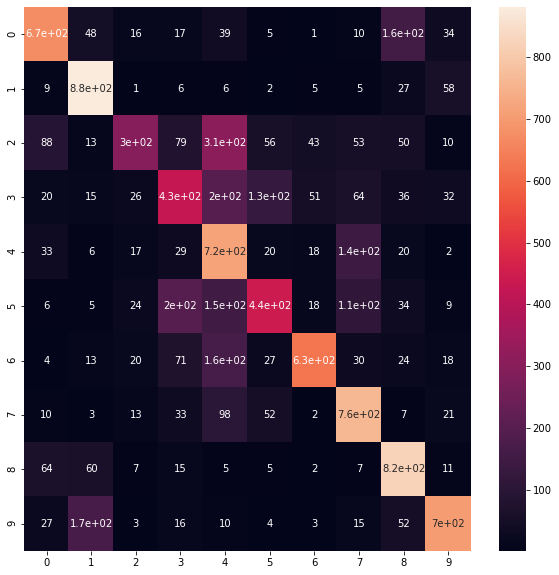

In [62]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

In [63]:
# Saving the model

import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

In [64]:
#Image Augmentation

import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [65]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [66]:
X_train.shape


(50000, 32, 32, 3)

In [67]:
n = 8 
X_train_sample = X_train[:n]

In [68]:
X_train_sample.shape

(8, 32, 32, 3)

In [69]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

In [74]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [75]:
datagen.fit(X_train)

In [76]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1879: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
1563/1563 [==============================] - 211s 135ms/step - loss: 319701628754067456.0000 - accuracy: 0.0016
Epoch 2/2
1563/1563 [==============================] - 179s 115ms/step - loss: nan - accuracy: 0.1696


In [78]:
score = cnn_model.evaluate(X_test, y_test)
print(score)


ValueError: in user code:

    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1268 test_function  *
        return step_function(self, iterator)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1259 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1262 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2734 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:3423 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1252 run_step  **
        outputs = model.test_step(data)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1221 test_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\losses.py:151 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\losses.py:254 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\losses.py:1547 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\backend.py:4937 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\tensor_shape.py:1158 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [79]:

# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)